# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(study_results, mouse_metadata)

# Display the data table for prview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
mouse_dupl = mouse_study_results["Mouse ID"].count()
mouse_dupl

1893

In [3]:
# Checking the number of mice.
num_mice = len(mouse_study_results['Mouse ID'].unique())
print(f'Total number of mice: {num_mice}')


Total number of mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_results[mouse_study_results.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_mice['Mouse ID'].unique()

print(f'Duplicate mice: {duplicate_mice}')

Duplicate mice: ['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID.

mouse_dupl_id = mouse_study_results[mouse_study_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(mouse_dupl_id)



    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21    

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = mouse_study_results.drop_duplicates('Mouse ID')
mouse_id.head() 



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.(minus head row)
number_of_mice =mouse_id["Mouse ID"].count()-1
number_of_mice



248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats = mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."}, inplace=True)


# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)





              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#non_dupl_data = mouse_id[["Drug Regimen", "Tumor Volumne (mm3)"]]
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
#agg_data = summary.groupby("Drug Regimen").index.name = ({"Tumor Volume (mm3)":["mean","median","var", "std","sem"]})
                                      #.aggregate({"Tumor Volume (mm3)":["MeanTumor Volume"]})
#.agg()({"Tumor Volume (mm3)": ["mean","median", "variance", "standard deviation", "SEM"]}
#agg_data 

summary_stats = mouse_study_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}).rename(columns={"mean": "mean", "median": "median", "var": "var", "std": "std. Dev.", "sem": "sem"})

print(summary_stats)

             Tumor Volume (mm3)                                          
                           mean     median        var std. Dev.       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

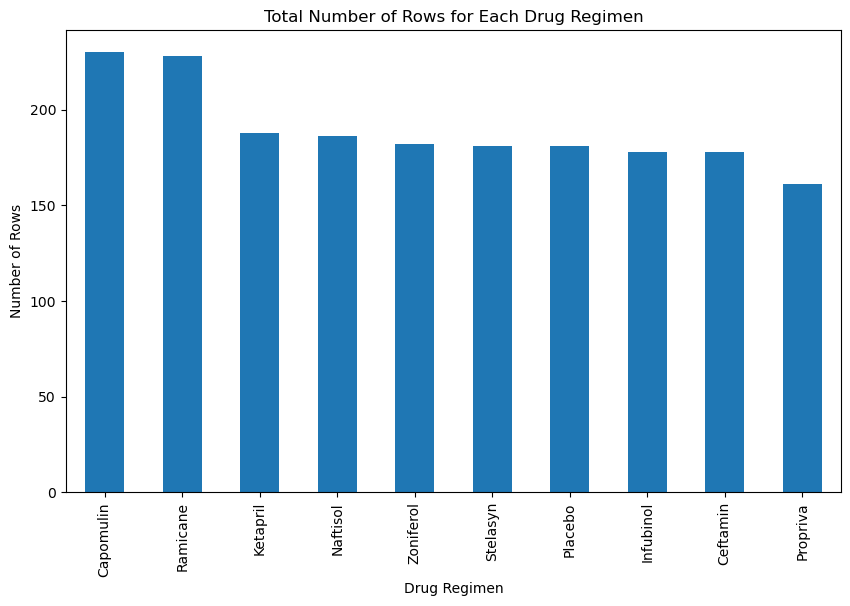

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = mouse_study_results["Drug Regimen"].value_counts()


counts.plot(kind="bar", figsize=(10, 6))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.title("Total Number of Rows for Each Drug Regimen")

plt.show()



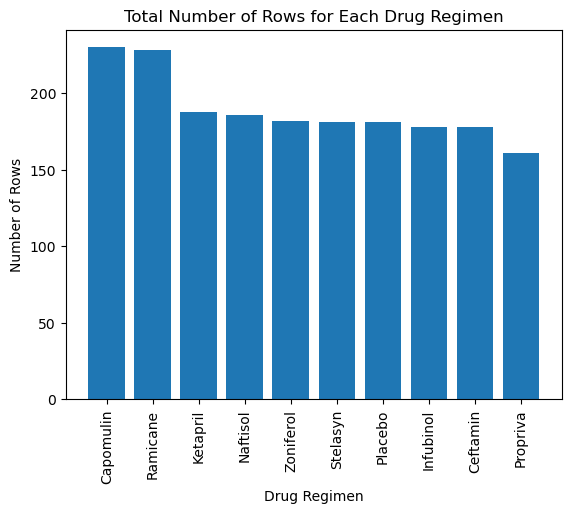

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import matplotlib.pyplot as plt

counts = mouse_study_results["Drug Regimen"].value_counts()


plt.bar(counts.index, counts.values)


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.title("Total Number of Rows for Each Drug Regimen")


plt.xticks(rotation=90)


plt.show()

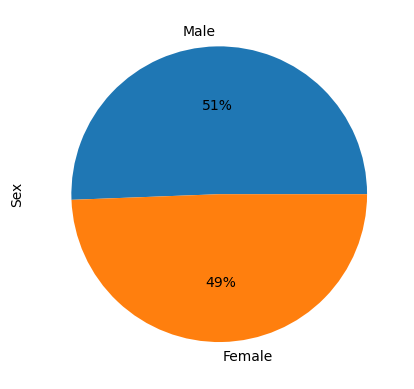

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = mouse_study_results["Sex"].value_counts(0)
explode = [0.0, 0]
gender_count.plot(kind="pie", autopct="%1.0f%%", explode=explode)
gender_count.plot(legend=False)
plt.show()

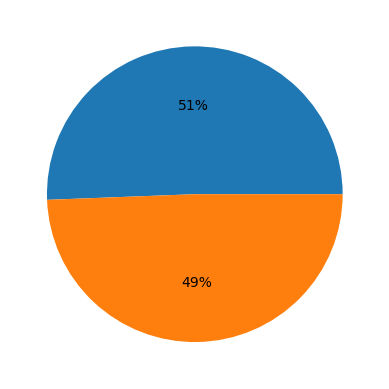

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["tab:blue", "tab:orange"]
explode = [0.0, 0]
genders = gender_count.index.values.tolist()
plt.pie(gender_count, explode=explode, colors=colors, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
mouse_study_results.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [15]:
df = mouse_study_results
df["Mouse ID"].unique().shape
df.shape

(1893, 8)

In [41]:
max_timepoint = mouse_study_results.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(max_timepoint, mouse_study_results, on=['Mouse ID', 'Timepoint'], how='left')
# Get the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_results.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, mouse_study_results, on=['Mouse ID', 'Timepoint'], how='left')


In [43]:
# Put treatments into a list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_vol_data = []



for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset of tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate and print the IQR for each treatment regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    iqr = quartiles[0.75] - quartiles[0.25]
    print(f'{treatment} regimen:')
    print(f'IQR: {iqr:.2f}')
    print(f'Potential outliers: {tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]}')
    print('---')


Capomulin regimen:
IQR: 7.78
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---
Ramicane regimen:
IQR: 9.10
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---
Infubinol regimen:
IQR: 11.48
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
---
Ceftamin regimen:
IQR: 15.58
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---


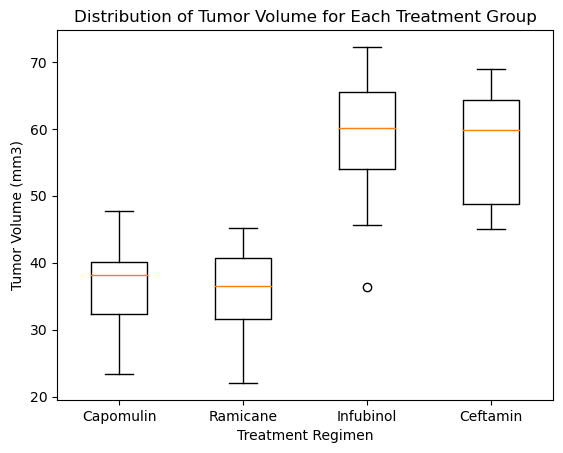

In [44]:
import matplotlib.pyplot as plt

# Create the box plot
plt.boxplot(tumor_vol_data, labels=treatments)

# Set plot labels and title
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show the plot
plt.show()


## Line and Scatter Plots

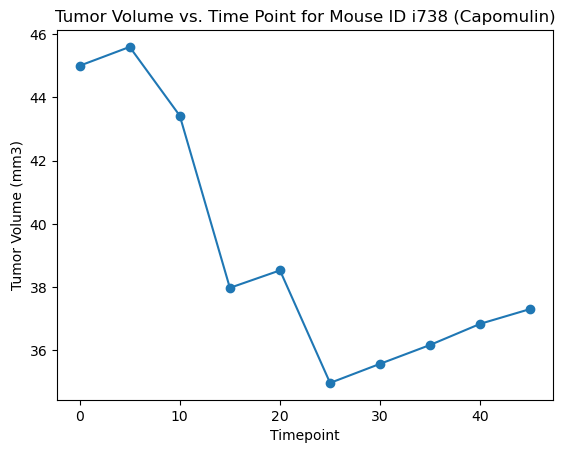

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import matplotlib.pyplot as plt

# Specify the mouse ID and Capomulin treatment
mouse_id = "i738"

# Filter the data for the specified mouse ID and Capomulin treatment
mouse_data = mouse_study_results[(mouse_study_results["Mouse ID"] == mouse_id) & (mouse_study_results["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")

# Set plot labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)")

# Show the plot
plt.show()

## Correlation and Regression

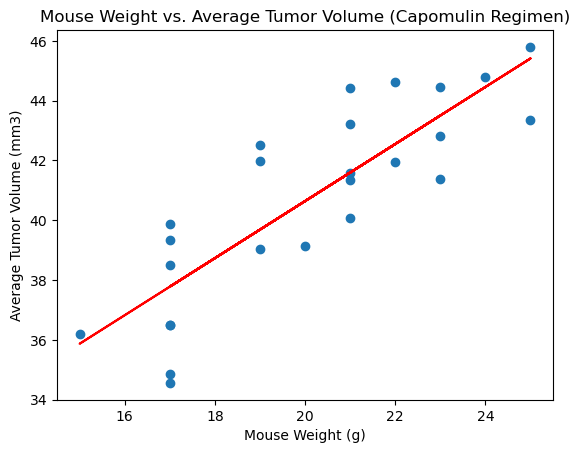

Correlation Coefficient: 0.8419363424694722


In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = mouse_study_results[mouse_study_results["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
correlation = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Set plot labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)
regression_values = slope * mouse_weight + intercept

# Plot the linear regression line
plt.plot(mouse_weight, regression_values, color="red")

# Show the plot
plt.show()

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)